## 다항회귀
+ 데이터가 단순한 직선의 형태가 아닌 비선형 형태여도 선형모델을 사용해서 비선형 모델을 학습할 수도 있음 
+ 이 때 각 특성을 거듭제곱으로 새로운 특성을 추가하고 확장된 특성을 포함한 데이터셋으로 선형모델을 학습시킴
+ 이렇게 학습시키는 방식을 다항회귀라 함

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#### $ 0.5x^2 + x + 2 + \epsilon $ 함수로 만든 데이터 시각화

In [3]:
np.random.seed(2111081605)

In [4]:
m = 100   # 난수 100개 생성
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * (X ** 2) + X + 2 + np.random.rand(m,1)  # np.random.rand(m,1) - 노이즈

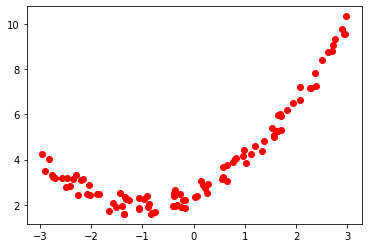

In [5]:
plt.plot(X,y, 'ro')

### 비선형 형태의 데이터들을 선형회귀로 풀어봄

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X.reshape(-1,1), y, train_size=0.7, random_state=2111081615)

In [7]:
lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

In [8]:
print(lrclf.coef_, '%.2f' % lrclf.intercept_)

[[1.04152488]] 4.08


In [9]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)
print('%.2f' % rmse, '%.2f' % r2)

1.33 0.60


In [10]:
a = lrclf.coef_
b = lrclf.intercept_
z = [ (a*x + b) for x in X ]

ValueError: x and y can be no greater than 2D, but have shapes (100, 1) and (100, 1, 1)

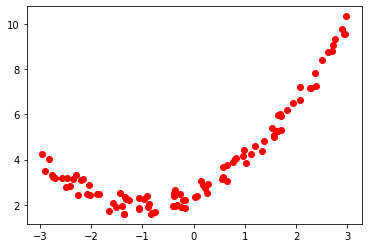

In [11]:
plt.plot(X, y, 'ro')
plt.plot(X, z, 'b--')

#### 비선형 형태의 데이터들을 다항회귀로 풀어봄

In [17]:
from sklearn.preprocessing import PolynomialFeatures

#### PolynomialFeatures(차수, 옵션)


In [18]:
pf = PolynomialFeatures(degree=2, include_bias=False)  # 차수(degree)는 2차

In [19]:
X_poly = pf.fit_transform(X.reshape(-1,1))

In [20]:
lr = LinearRegression()

In [35]:
lr.fit(X_poly, y)

ValueError: Found input variables with inconsistent numbers of samples: [100, 10]

In [22]:
print(lr.coef_, lr.intercept_)

[[1.0104244  0.50239624]] [2.52290596]


In [23]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)
print(rmse, '%.2f' % r2)

1.422123699224205 0.59


In [179]:
pf.get_feature_names() # 1- 상수항, x0 - 1차항, x0^2 - 2차항

/opt/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x0^2']

In [24]:
pf.get_feature_names_out()
# y = 0.5x^2 + 1.02x + 2.51

array(['x0', 'x0^2'], dtype=object)

#### 새롭게 만들어진 다항식으로 시각화

In [25]:
X_new = np.linspace(-3, 3, 100).reshape(-1,1)
X_new_poly = pf.transform(X_new)
pred = lr.predict(X_new_poly)

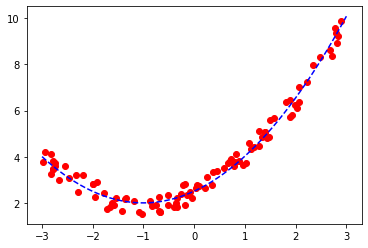

In [26]:
plt.plot(X, y, 'ro')
plt.plot(X_new, pred, 'b--')

In [36]:
np.sqrt(mean_squared_error(y, pred))
r2_score(y, pred)

ValueError: Found input variables with inconsistent numbers of samples: [10, 100]

#### 다항회귀로 모델을 작성하고 다항식을 출력하기

In [79]:
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0]).reshape(-1,1)
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

In [93]:
X[:3]

array([[258.],
       [270.],
       [294.]])

#### 데이터 시각화

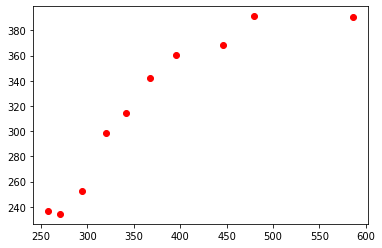

In [80]:
plt.plot(X, y, 'ro')

#### 선형 회귀

In [81]:
lrclf = LinearRegression()
lrclf.fit(X,y)

LinearRegression()

In [82]:
lrclf.coef_, lrclf.intercept_

(array([0.54]), 115.78555030272872)

In [83]:
z = lrclf.predict(X)

#### 선형모델 시각화

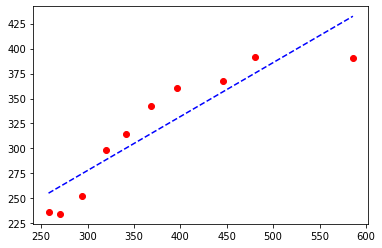

In [84]:
plt.plot(X, y, 'ro')
plt.plot(X, z, 'b--')

#### 평균제곱오차, 결정력 확인

In [85]:
rmse = np.sqrt(mean_squared_error(y, z))
r2 = r2_score(y, z)
print(rmse, '%.2f' % r2)

23.870057945432823 0.83


#### 다항회귀모델 생성 

In [86]:
pf = PolynomialFeatures(degree=2, include_bias=False)

In [87]:
X_poly = pf.fit_transform(X)

In [94]:
X_poly[:3] # 258**2

array([[  258., 66564.],
       [  270., 72900.],
       [  294., 86436.]])

In [88]:
plr = LinearRegression()
plr.fit(X_poly, y)

LinearRegression()

In [89]:
np.set_printoptions(precision = 3, suppress=True)
plr.coef_, plr.intercept_
# y = 2.339x - 0.002x2 - 243.229

(array([ 2.399, -0.002]), -243.22877740016145)

In [90]:
z = plr.predict(X_poly)

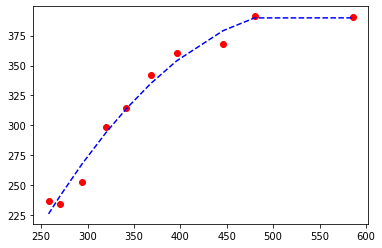

In [91]:
plt.plot(X, y, 'ro')
plt.plot(X, z, 'b--')

In [92]:
rmse = np.sqrt(mean_squared_error(y, z))
r2 = r2_score(y, z)
print(rmse, '%.2f' % r2)

7.831360962019769 0.98
